C:\Users\Senth\AppData\Local\Temp\ipykernel_20344\3488806003.py:17: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(32, 32, 3))


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 152s 174ms/step - accuracy: 0.2321 - loss: 2.0981 - val_accuracy: 0.3108 - val_loss: 1.8988
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 132s 168ms/step - accuracy: 0.3065 - loss: 1.9077 - val_accuracy: 0.3225 - val_loss: 1.8671
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 136s 174ms/step - accuracy: 0.3154 - loss: 1.8816 - val_accuracy: 0.3307 - val_loss: 1.8483
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 135s 173ms/step - accuracy: 0.3226 - loss: 1.8575 - val_accuracy: 0.3358 - val_loss: 1.8359
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 132s 169ms/step - accuracy: 0.3331 - loss: 1.8428 - val_accuracy: 0.3414 - val_loss: 1.8284
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 137s 163ms/step - accuracy: 0.3347 - loss: 1.8292 - val_accuracy: 0.3393 - val_loss: 1.8189
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 133s 170ms/step - accuracy: 0.3371 - loss: 1.8303 - val_accuracy: 0.3428 - val_loss: 1.8134
Epoch 8/10
782/782 ━━━━━━━━

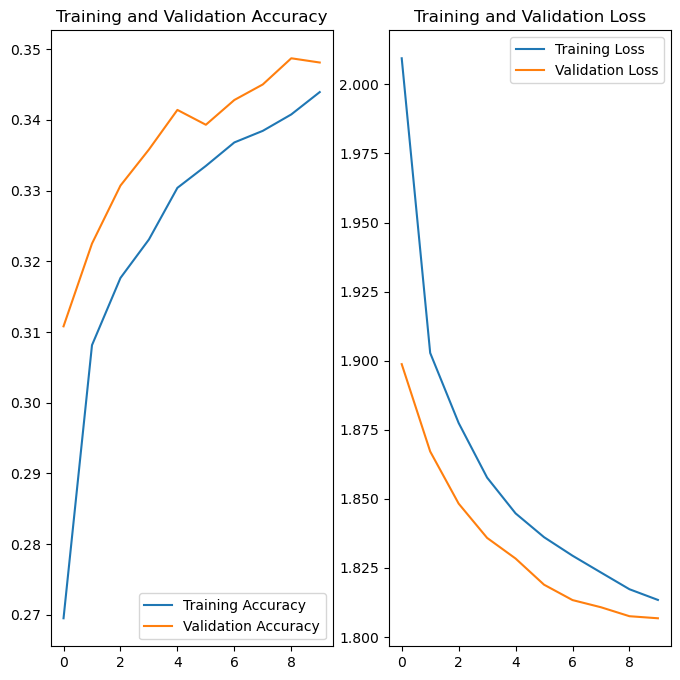

In [23]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.applications import MobileNetV2
import matplotlib.pyplot as plt

# Load the CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
x_train, x_test = x_train / 255.0, x_test / 255.0

# Convert class vectors to one-hot encoded vectors
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

# Load the pre-trained MobileNetV2 model without the top (classification) layers
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

# Freeze the base model
base_model.trainable = False

# Add custom classification layers on top
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),  # Pool the feature maps
    layers.Dense(128, activation='relu'),  # Add a fully connected layer
    layers.Dropout(0.5),  # Add dropout for regularization
    layers.Dense(10, activation='softmax')  # Output layer for 10 classes
])

# Compile the model
model.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

# Train the model
history = model.fit(
    x_train, y_train,
    epochs=10,  # Use 10 epochs for quick training
    batch_size=64,
    validation_data=(x_test, y_test)
)

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"\nTest accuracy: {test_acc}")

# Plot training & validation accuracy and loss
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(10)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()
